# **Valorizing Organic Waste in Schools: A Thematic-NLP Analysis of Student Experiences with Eco-Enzyme as a Sustainability Practice**

**Authors:** Desvita Nursayla Putri Cantika, Salwa Asysyifa Khoerunisa, Nazwa Hilda Syafira – *Universitas Linggabuana PGRI Sukabumi*  
**Date:** 20 July 2025  
**Project:** Mapping Themes from Open-Ended Survey Responses Using NLP Techniques (Bigram/Trigram Analysis)

### **Text Cleaning, Tokenization, and Frequency Analysis**

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Columns found: ['id', 'question', 'response']

🔎 Total filtered tokens: 96
📌 Sample tokens: ['wash', 'dishes', 'clean', 'floor', 'wipe', 'glass', 'surfaces', 'using', 'eco', 'enzyme']

📊 Top 10 Frequent Words:
fertilizer: 7
clean: 5
organic: 5
feed: 5
animal: 4
compost: 4
floor: 3
glass: 3
eco: 3
enzyme: 3


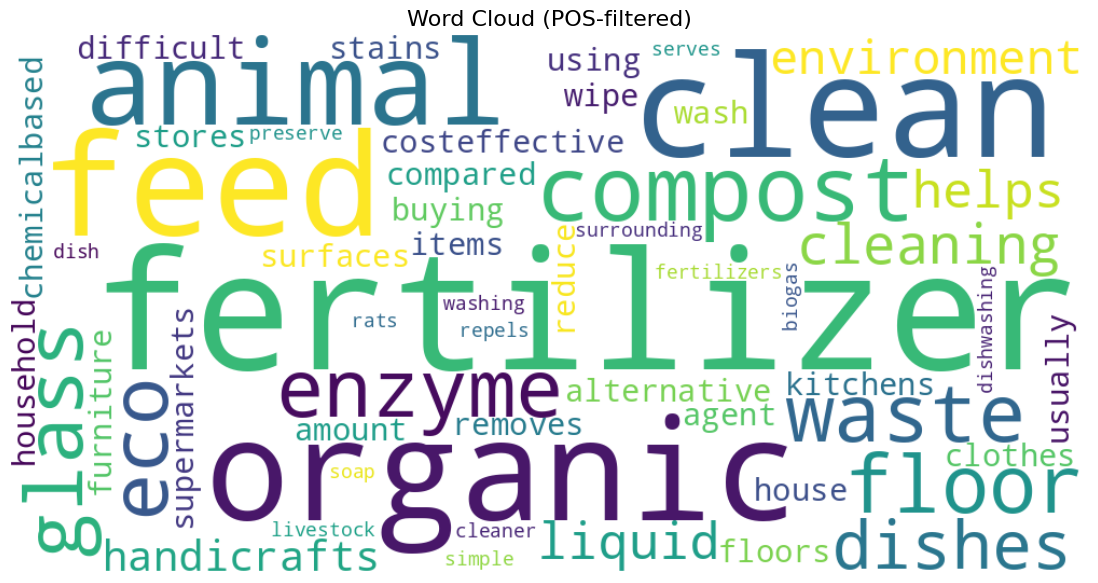

In [1]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import os

# --- DOWNLOAD NLTK MODELS ---
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")

# --- INITIALIZE TOKENIZER ---
tokenizer = TreebankWordTokenizer()

# --- CUSTOM STOPWORDS ---
custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())

stop_words = set(stopwords.words("english")) | custom_stopwords

# --- LOAD RAW DATA ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- FILTER OPEN-ENDED QUESTIONS ONLY ---
filtered = df[df["question"].str.contains("benefits|products", case=False, na=False)]

# --- JOIN RESPONSES INTO A SINGLE TEXT ---
text = " ".join(filtered["response"].dropna().astype(str).tolist()).lower()
text = text.translate(str.maketrans("", "", string.punctuation))

# --- SAVE CLEANED TEXT ---
pd.DataFrame({"cleaned_text": [text]}).to_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/processed/cleaned_data.csv", index=False)

# --- TOKENIZATION + STOPWORD REMOVAL ---
tokens = tokenizer.tokenize(text)
tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

# --- SAVE TOKENIZED TEXT ---
pd.DataFrame({"token": tokens}).to_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/processed/tokenized_data.csv", index=False)

# --- PART-OF-SPEECH TAGGING ---
tagged_tokens = pos_tag(tokens)

# --- FILTER BY MEANINGFUL POS TAGS ---
meaningful_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
filtered_tokens = [word for word, tag in tagged_tokens if tag in meaningful_tags]

# --- SHOW SAMPLE TOKENS ---
print(f"\n🔎 Total filtered tokens: {len(filtered_tokens)}")
print("📌 Sample tokens:", filtered_tokens[:10])

# --- COUNT FREQUENT WORDS ---
freq = Counter(filtered_tokens)
print("\n📊 Top 10 Frequent Words:")
for word, count in freq.most_common(10):
    print(f"{word}: {count}")

# --- SAVE FREQUENT WORDS TABLE ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables", exist_ok=True)
freq_df = pd.DataFrame(freq.most_common(), columns=["word", "frequency"])
freq_df.to_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/frequent_words.csv", index=False)

# --- GENERATE AND SAVE WORDCLOUD ---
if freq:
    wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(freq)
    os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization", exist_ok=True)
    wordcloud.to_file("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/wordcloud.png")

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud (POS-filtered)", fontsize=16)
    plt.show()
else:
    print("⚠️ Not enough tokens to generate a word cloud.")


### **Bigram Extraction and Frequency Analysis**

In [2]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import os

# --- NLTK Setup ---
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")

# --- Initialize Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()

custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())

stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Raw Dataset ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter Open-ended Questions (Benefits & Products) ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Function to Extract Bigrams with POS Tag Filtering ---
def extract_bigrams(text_series):
    text = " ".join(text_series.dropna().astype(str).tolist()).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tagged = pos_tag(tokens)
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    filtered = [word for word, tag in tagged if tag in allowed_tags]
    bigrams = list(ngrams(filtered, 2))
    return Counter(bigrams)

# --- Extract Bigrams for Each Type ---
benefits_bigrams = extract_bigrams(filtered_benefits["response"])
products_bigrams = extract_bigrams(filtered_products["response"])

# --- Display Top Bigrams ---
print("\n📊 Sorted Bigrams (Benefits):")
for (w1, w2), count in benefits_bigrams.most_common():
    print(f"{w1} {w2}: {count}")

print("\n📊 Sorted Bigrams (Products):")
for (w1, w2), count in products_bigrams.most_common():
    print(f"{w1} {w2}: {count}")

# --- Save to output/tables/bigram_data.csv ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables", exist_ok=True)

benefit_df = pd.DataFrame(benefits_bigrams.most_common(), columns=["benefit_bigram", "benefit_freq"])
benefit_df["benefit_bigram"] = benefit_df["benefit_bigram"].apply(lambda x: f"{x[0]} {x[1]}")

product_df = pd.DataFrame(products_bigrams.most_common(), columns=["product_bigram", "product_freq"])
product_df["product_bigram"] = product_df["product_bigram"].apply(lambda x: f"{x[0]} {x[1]}")

# Merge for final table
max_len = max(len(benefit_df), len(product_df))
benefit_df = benefit_df.reindex(range(max_len))
product_df = product_df.reindex(range(max_len))
final_bigram_table = pd.concat([benefit_df, product_df], axis=1)

final_bigram_table.to_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/bigram_data.csv", index=False)
print("✅ Bigrams saved to output/tables/bigram_data.csv")


✅ Columns found: ['id', 'question', 'response']

📊 Sorted Bigrams (Benefits):
clean floor: 2
eco enzyme: 2
wash dishes: 1
dishes clean: 1
floor wipe: 1
wipe glass: 1
glass surfaces: 1
surfaces using: 1
using eco: 1
enzyme costeffective: 1
costeffective alternative: 1
alternative compared: 1
compared buying: 1
buying chemicalbased: 1
chemicalbased cleaning: 1
cleaning stores: 1
stores supermarkets: 1
supermarkets removes: 1
removes stains: 1
stains usually: 1
usually difficult: 1
difficult clean: 1
clean floors: 1
floors kitchens: 1
kitchens glass: 1
glass clothes: 1
clothes cleaning: 1
cleaning agent: 1
agent clean: 1
floor eco: 1
enzyme liquid: 1
liquid clean: 1
clean house: 1
house furniture: 1
furniture household: 1
household items: 1
items helps: 1
helps reduce: 1
reduce amount: 1
amount organic: 1
organic waste: 1
waste surrounding: 1
surrounding environment: 1
environment helps: 1
helps preserve: 1
preserve environment: 1
environment repels: 1
repels rats: 1
rats serves: 1
serves

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Trigram Extraction and Frequency Analysis**

In [4]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import os

# --- NLTK Setup ---
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")

# --- Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()

custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())

stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Data ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter responses related to 'benefits' and 'products' ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Trigram extraction function with POS filtering ---
def extract_trigrams(text_series):
    text = " ".join(text_series.dropna().astype(str).tolist()).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tagged = pos_tag(tokens)
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    filtered = [word for word, tag in tagged if tag in allowed_tags]
    trigrams = list(ngrams(filtered, 3))
    return Counter(trigrams)

# --- Extract trigrams ---
benefits_trigrams = extract_trigrams(filtered_benefits["response"])
products_trigrams = extract_trigrams(filtered_products["response"])

# --- Print sorted trigram frequencies ---
print("\n📊 Sorted Trigrams (Benefits):")
for (w1, w2, w3), count in benefits_trigrams.most_common():
    print(f"{w1} {w2} {w3}: {count}")

print("\n📊 Sorted Trigrams (Products):")
for (w1, w2, w3), count in products_trigrams.most_common():
    print(f"{w1} {w2} {w3}: {count}")

# --- Save trigram data to CSV ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables", exist_ok=True)

# Convert trigram tuples to strings
benefits_df = pd.DataFrame(benefits_trigrams.most_common(), columns=["Benefits", "Frequency_Benefits"])
benefits_df["Benefits"] = benefits_df["Benefits"].apply(lambda x: " ".join(x))

products_df = pd.DataFrame(products_trigrams.most_common(), columns=["Products", "Frequency_Products"])
products_df["Products"] = products_df["Products"].apply(lambda x: " ".join(x))

# Merge into single DataFrame (left join to align by index)
max_len = max(len(benefits_df), len(products_df))
benefits_df = benefits_df.reindex(range(max_len)).reset_index(drop=True)
products_df = products_df.reindex(range(max_len)).reset_index(drop=True)
merged_df = pd.concat([benefits_df, products_df], axis=1)

# Save to file
merged_df.to_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/trigram_data.csv", index=False)
print("✅ Trigrams saved to output/tables/trigram_data.csv")

✅ Columns found: ['id', 'question', 'response']

📊 Sorted Trigrams (Benefits):
wash dishes clean: 1
dishes clean floor: 1
clean floor wipe: 1
floor wipe glass: 1
wipe glass surfaces: 1
glass surfaces using: 1
surfaces using eco: 1
using eco enzyme: 1
eco enzyme costeffective: 1
enzyme costeffective alternative: 1
costeffective alternative compared: 1
alternative compared buying: 1
compared buying chemicalbased: 1
buying chemicalbased cleaning: 1
chemicalbased cleaning stores: 1
cleaning stores supermarkets: 1
stores supermarkets removes: 1
supermarkets removes stains: 1
removes stains usually: 1
stains usually difficult: 1
usually difficult clean: 1
difficult clean floors: 1
clean floors kitchens: 1
floors kitchens glass: 1
kitchens glass clothes: 1
glass clothes cleaning: 1
clothes cleaning agent: 1
cleaning agent clean: 1
agent clean floor: 1
clean floor eco: 1
floor eco enzyme: 1
eco enzyme liquid: 1
enzyme liquid clean: 1
liquid clean house: 1
clean house furniture: 1
house furnitu

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Visualization**

#### Bigram Network Graph Construction for Gephi

In [5]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import os

# --- NLTK Setup ---
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")

# --- Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()
custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())
stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Questionnaire Data ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter Data by Question Type ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Extract Bigrams Using POS Tagging ---
def extract_bigrams_pos(text_series):
    bigram_counter = Counter()
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    for text in text_series.dropna().astype(str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = tokenizer.tokenize(text)
        tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
        tagged = pos_tag(tokens)
        filtered = [word for word, tag in tagged if tag in allowed_tags]
        bigrams = list(ngrams(filtered, 2))
        bigram_counter.update(bigrams)
    return bigram_counter

# --- Extract Bigrams from Benefits and Products ---
benefits_bigrams = extract_bigrams_pos(filtered_benefits["response"])
products_bigrams = extract_bigrams_pos(filtered_products["response"])

# --- Combine and Tag Bigrams by Source ---
combined_bigrams = {}
for (w1, w2), freq in benefits_bigrams.items():
    combined_bigrams[(w1, w2)] = {"freq": freq, "source": "benefits"}
for (w1, w2), freq in products_bigrams.items():
    if (w1, w2) in combined_bigrams:
        combined_bigrams[(w1, w2)]["freq"] += freq
        combined_bigrams[(w1, w2)]["source"] = "both"
    else:
        combined_bigrams[(w1, w2)] = {"freq": freq, "source": "products"}

# --- Build Network Graph for Gephi ---
G = nx.Graph()
for (w1, w2), meta in combined_bigrams.items():
    G.add_edge(w1, w2, weight=meta["freq"], category=meta["source"])

# --- Assign Node Colors Based on Category ---
for node in G.nodes():
    G.nodes[node]["label"] = node
    G.nodes[node]["color"] = {
        "benefits": "#1f77b4",     # blue
        "products": "#2ca02c",     # green
        "both": "#ff7f0e"          # orange
    }.get(
        next((meta["source"] for (n1, n2), meta in combined_bigrams.items() if node in (n1, n2)), "products")
    )

# --- Save GEXF File for Gephi ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization", exist_ok=True)
nx.write_gexf(G, "/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/bigram_key_mapping.gexf")
print("✅ GEXF file saved to: /content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/bigram_key_mapping.gexf")

✅ Columns found: ['id', 'question', 'response']
✅ GEXF file saved to: /content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/bigram_key_mapping.gexf


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Trigram Network Graph Construction for Gephi

In [6]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import os

# --- NLTK Setup ---
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")

# --- Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()
custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())
stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Questionnaire Data ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter Responses by Question Topic ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Trigram Extraction with POS Tagging ---
def extract_trigrams_pos(text_series):
    trigram_counter = Counter()
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    for text in text_series.dropna().astype(str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = tokenizer.tokenize(text)
        tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
        tagged = pos_tag(tokens)
        filtered = [word for word, tag in tagged if tag in allowed_tags]
        trigrams = list(ngrams(filtered, 3))
        trigram_counter.update(trigrams)
    return trigram_counter

# --- Extract Trigrams from Each Topic ---
benefits_trigrams = extract_trigrams_pos(filtered_benefits["response"])
products_trigrams = extract_trigrams_pos(filtered_products["response"])

# --- Combine Trigram Frequencies and Mark Source ---
combined_trigrams = {}
for (w1, w2, w3), freq in benefits_trigrams.items():
    combined_trigrams[(w1, w2, w3)] = {"freq": freq, "source": "benefits"}
for (w1, w2, w3), freq in products_trigrams.items():
    if (w1, w2, w3) in combined_trigrams:
        combined_trigrams[(w1, w2, w3)]["freq"] += freq
        combined_trigrams[(w1, w2, w3)]["source"] = "both"
    else:
        combined_trigrams[(w1, w2, w3)] = {"freq": freq, "source": "products"}

# --- Build Trigram Graph (w1-w2-w3 path)
G = nx.Graph()
for (w1, w2, w3), meta in combined_trigrams.items():
    G.add_edge(w1, w2, weight=meta["freq"], category=meta["source"])
    G.add_edge(w2, w3, weight=meta["freq"], category=meta["source"])

# --- Assign Node Attributes (label and color) ---
for node in G.nodes():
    G.nodes[node]["label"] = node
    G.nodes[node]["color"] = {
        "benefits": "#1f77b4",     # blue
        "products": "#2ca02c",     # green
        "both": "#ff7f0e"          # orange
    }.get(
        next((meta["source"] for (n1, n2, n3), meta in combined_trigrams.items() if node in (n1, n2, n3)), "products")
    )

# --- Print Count of Overlapping Trigrams ---
both_trigrams = [key for key, val in combined_trigrams.items() if val["source"] == "both"]
print(f"🔍 Total trigrams shared by BOTH benefits & products: {len(both_trigrams)}")

# --- Save GEXF File for Gephi ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization", exist_ok=True)
nx.write_gexf(G, "/content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/trigram_key_mapping.gexf")
print("✅ GEXF file saved to: /content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/trigram_key_mapping.gexf")


✅ Columns found: ['id', 'question', 'response']
🔍 Total trigrams shared by BOTH benefits & products: 0
✅ GEXF file saved to: /content/drive/MyDrive/eco-enzyme-rta-nlp/output/visualization/trigram_key_mapping.gexf


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **NLP to Theme Mapping**

#### Bigram Extraction & Theme Mapping

In [7]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import os

# --- NLTK Setup ---
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")

# --- Initialize Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()

custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())

stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Raw Dataset ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter Open-ended Questions Related to Benefits and Products ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Function to Extract Bigrams with POS Tag Filtering ---
def extract_bigrams(text_series):
    text = " ".join(text_series.dropna().astype(str).tolist()).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tagged = pos_tag(tokens)
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    filtered = [word for word, tag in tagged if tag in allowed_tags]
    bigrams = list(ngrams(filtered, 2))
    return Counter(bigrams)

# --- Extract Bigrams from Each Category ---
benefits_bigrams = extract_bigrams(filtered_benefits["response"])
products_bigrams = extract_bigrams(filtered_products["response"])

# --- Create Output Folder ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables", exist_ok=True)

# --- Create DataFrames for Each Bigram Set ---
benefit_df = pd.DataFrame(benefits_bigrams.most_common(), columns=["bigram", "benefit_freq"])
benefit_df["bigram"] = benefit_df["bigram"].apply(lambda x: f"{x[0]} {x[1]}")

product_df = pd.DataFrame(products_bigrams.most_common(), columns=["bigram", "product_freq"])
product_df["bigram"] = product_df["bigram"].apply(lambda x: f"{x[0]} {x[1]}")

# --- Combine and De-duplicate Bigrams ---
combined_df = pd.merge(benefit_df, product_df, on="bigram", how="outer").fillna(0)
combined_df["benefit_freq"] = combined_df["benefit_freq"].astype(int)
combined_df["product_freq"] = combined_df["product_freq"].astype(int)
combined_df["total_freq"] = combined_df["benefit_freq"] + combined_df["product_freq"]

# --- Define Theme and Associated Keywords ---
theme_keywords = {
    "Household Cost Efficiency": [
        "costeffective", "alternative", "cheap", "buying", "stores", "supermarkets", "clean", "floor", "wipe",
        "furniture", "household", "items", "agent", "liquid", "dishwashing", "soap"
    ],
    "Environmental Conservation": [
        "eco", "enzyme", "organic", "waste", "preserve", "environment", "reduce", "helps", "surrounding", "repels", "rats"
    ],
    "Waste-to-Product Diversification": [
        "animal", "feed", "compost", "fertilizer", "handicrafts", "biogas", "livestock", "products", "conversion"
    ]
}

# --- Function to Automatically Map Bigram to Theme ---
def map_bigram_to_theme(bigram_text):
    for theme, keywords in theme_keywords.items():
        for kw in keywords:
            if kw in bigram_text:
                return theme
    return "Unknown"

# --- Apply Theme Mapping ---
combined_df["theme"] = combined_df["bigram"].apply(map_bigram_to_theme)

# --- Save Final CSV ---
output_path = "/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/bigram_nlp_theme_mapping.csv"
combined_df[["bigram", "benefit_freq", "product_freq", "total_freq", "theme"]].to_csv(output_path, index=False)

print(f"✅ Bigram with theme mapping saved to {output_path}")
print(combined_df.head())


✅ Columns found: ['id', 'question', 'response']
✅ Bigram with theme mapping saved to /content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/bigram_nlp_theme_mapping.csv
                 bigram  benefit_freq  product_freq  total_freq  \
0           agent clean             1             0           1   
1  alternative compared             1             0           1   
2        amount organic             1             0           1   
3           animal feed             0             4           4   
4         biogas animal             0             1           1   

                              theme  
0         Household Cost Efficiency  
1         Household Cost Efficiency  
2        Environmental Conservation  
3  Waste-to-Product Diversification  
4  Waste-to-Product Diversification  


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Trigram Extraction & Theme Mapping

In [8]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from collections import Counter
import os

# --- NLTK Setup ---
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")

# --- Initialize Tokenizer and Stopwords ---
tokenizer = TreebankWordTokenizer()

custom_stopwords = set("""
a about above after again against all am an and any are aren't as at be because been
before being below between both but by can't cannot could couldn't did didn't do does
doesn't doing don't down during each few for from further had hadn't has hasn't have
haven't having he he'd he'll he's her here here's hers herself him himself his how
how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most
mustn't my myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some such than
that that's the their theirs them themselves then there there's these they they'd
they'll they're they've this those through to too under until up very was wasn't we
we'd we'll we're we've were weren't what what's when when's where where's which while
who who's whom why why's with won't would wouldn't you you'd you'll you're you've your
yours yourself yourselves can used use get also etc even just like yes turned example
make made processed many product products
""".split())

stop_words = set(stopwords.words("english")) | custom_stopwords

# --- Load Raw Dataset ---
df = pd.read_csv("/content/drive/MyDrive/eco-enzyme-rta-nlp/data/raw/student_responses.csv", encoding="utf-8-sig")
print("✅ Columns found:", df.columns.tolist())

# --- Filter Open-ended Questions Related to Benefits and Products ---
filtered_benefits = df[df["question"].str.contains("benefits", case=False, na=False)]
filtered_products = df[df["question"].str.contains("products", case=False, na=False)]

# --- Function to Extract Trigrams with POS Tag Filtering ---
def extract_trigrams(text_series):
    text = " ".join(text_series.dropna().astype(str).tolist()).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tagged = pos_tag(tokens)
    allowed_tags = {"NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"}
    filtered = [word for word, tag in tagged if tag in allowed_tags]
    trigrams = list(ngrams(filtered, 3))
    return Counter(trigrams)

# --- Extract Trigrams from Each Category ---
benefits_trigrams = extract_trigrams(filtered_benefits["response"])
products_trigrams = extract_trigrams(filtered_products["response"])

# --- Create Output Folder ---
os.makedirs("/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables", exist_ok=True)

# --- Create DataFrames for Each Trigram Set ---
benefit_df = pd.DataFrame(benefits_trigrams.most_common(), columns=["trigram", "benefit_freq"])
benefit_df["trigram"] = benefit_df["trigram"].apply(lambda x: f"{x[0]} {x[1]} {x[2]}")

product_df = pd.DataFrame(products_trigrams.most_common(), columns=["trigram", "product_freq"])
product_df["trigram"] = product_df["trigram"].apply(lambda x: f"{x[0]} {x[1]} {x[2]}")

# --- Combine and De-duplicate Trigrams ---
combined_df = pd.merge(benefit_df, product_df, on="trigram", how="outer").fillna(0)
combined_df["benefit_freq"] = combined_df["benefit_freq"].astype(int)
combined_df["product_freq"] = combined_df["product_freq"].astype(int)
combined_df["total_freq"] = combined_df["benefit_freq"] + combined_df["product_freq"]

# --- Define Theme and Associated Keywords ---
theme_keywords = {
    "Household Cost Efficiency": [
        "costeffective", "alternative", "cheap", "buying", "stores", "supermarkets", "clean", "floor", "wipe",
        "furniture", "household", "items", "agent", "liquid", "dishwashing", "soap"
    ],
    "Environmental Conservation": [
        "eco", "enzyme", "organic", "waste", "preserve", "environment", "reduce", "helps", "surrounding", "repels", "rats"
    ],
    "Waste-to-Product Diversification": [
        "animal", "feed", "compost", "fertilizer", "handicrafts", "biogas", "livestock", "products", "conversion"
    ]
}

# --- Function to Automatically Map Trigram to Theme ---
def map_trigram_to_theme(trigram_text):
    for theme, keywords in theme_keywords.items():
        for kw in keywords:
            if kw in trigram_text:
                return theme
    return "Unknown"

# --- Apply Theme Mapping ---
combined_df["theme"] = combined_df["trigram"].apply(map_trigram_to_theme)

# --- Save Final CSV ---
output_path = "/content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/trigram_nlp_theme_mapping.csv"
combined_df[["trigram", "benefit_freq", "product_freq", "total_freq", "theme"]].to_csv(output_path, index=False)

print(f"✅ Trigram with theme mapping saved to {output_path}")
print(combined_df.head())


✅ Columns found: ['id', 'question', 'response']
✅ Trigram with theme mapping saved to /content/drive/MyDrive/eco-enzyme-rta-nlp/output/tables/trigram_nlp_theme_mapping.csv
                       trigram  benefit_freq  product_freq  total_freq  \
0            agent clean floor             1             0           1   
1  alternative compared buying             1             0           1   
2         amount organic waste             1             0           1   
3          animal feed compost             0             2           2   
4      animal feed handicrafts             0             1           1   

                              theme  
0         Household Cost Efficiency  
1         Household Cost Efficiency  
2        Environmental Conservation  
3  Waste-to-Product Diversification  
4  Waste-to-Product Diversification  


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
